<div class='alert alert-info alert-block' align='center'><h1><b>Finding the Yeast Type</b></h1></div>
<div  align='center'><h5><b>By using Support Vector Machine Model</b></h5></div>

## Problem Statement

One of the Microbiology companies is looking to classify the cellular localization sites of proteins based on the dataset. Here, you are working on the dataset with various features, which are the dimensions and singles given by the business. You have to create a classification algorithm using the support vector machine.

## Data Dictionary of the dataset
- Sequence Name - Accession number for the SWISS-PROT database
- mcg - McGeoch's method for signal sequence recognition
- gvh - von Heijne's method for signal sequence recognition
- alm - Score of the ALOM membrane spanning region prediction program
- mit - Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins
- erl - Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen), binary attribute
- pox - Peroxisomal targeting signal in the C-terminus
- vac - Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins
- nuc - Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins
- YeastType - This is the dependent variable

In [4]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for modelling
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score , confusion_matrix , ConfusionMatrixDisplay , roc_auc_score , \
roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss 
from sklearn.preprocessing import StandardScaler , LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset

df = pd.read_csv(r"Yeast_Data.csv")
df.head()

,SequenceName,MCG,GVH,ALM,MIT,ERL,POX,VAC,NUC,YeastType
0,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
1,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
2,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
3,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
4,ACE1_YEAST,0.43,0.39,0.54,0.21,0.5,0.0,0.53,0.27,NUC


In [8]:
# rows and columns of the data
df.shape

(892, 10)

In [12]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SequenceName  892 non-null    object 
 1   MCG           892 non-null    float64
 2   GVH           892 non-null    float64
 3   ALM           892 non-null    float64
 4   MIT           892 non-null    float64
 5   ERL           892 non-null    float64
 6   POX           892 non-null    float64
 7   VAC           892 non-null    float64
 8   NUC           892 non-null    float64
 9   YeastType     892 non-null    object 
dtypes: float64(8), object(2)
memory usage: 69.8+ KB


In [14]:
# Checking for null values in data
df.isnull().sum()

SequenceName    0
MCG             0
GVH             0
ALM             0
MIT             0
ERL             0
POX             0
VAC             0
NUC             0
YeastType       0
dtype: int64

**There are no null values in the data**

In [18]:
# Checking for duplicates
df.duplicated().sum()

22

In [20]:
# dropping duplicates records
df.drop_duplicates(inplace=True)

<div class='alert alert-info alert-block' align='center'><h3><b>Exploratory Data Analysis</b></h3></div>

In [24]:
# statistics description about the data
df.describe()

,MCG,GVH,ALM,MIT,ERL,POX,VAC,NUC
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.466977,0.463931,0.530839,0.226011,0.504023,0.000575,0.498402,0.295172
std,0.109883,0.101297,0.058896,0.110786,0.044695,0.016952,0.060480,0.122338
min,0.110000,0.130000,0.320000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.390000,0.400000,0.500000,0.160000,0.500000,0.000000,0.470000,0.220000
50%,0.470000,0.460000,0.530000,0.190000,0.500000,0.000000,0.510000,0.250000
75%,0.540000,0.530000,0.560000,0.270000,0.500000,0.000000,0.530000,0.330000
max,0.900000,0.830000,1.000000,1.000000,1.000000,0.500000,0.730000,1.000000


In [26]:
# Number of unique records and unique values 
for col in df.columns:
    print(f'Column : {col}\nUnique Record : {df[col].nunique()}')
    print(df[col].unique())
    print('****************\n')

Column : SequenceName
Unique Record : 870
['AAR2_YEAST' 'AATC_YEAST' 'BAF1_YEAST' 'ABP1_YEAST' 'ACE1_YEAST'
 'ACE2_YEAST' 'ACH1_YEAST' 'ACT_YEAST' 'ACT2_YEAST' 'ACT3_YEAST'
 'ACT5_YEAST' 'ADA2_YEAST' 'C1TC_YEAST' 'PUR4_YEAST' 'PUR3_YEAST'
 'ADH1_YEAST' 'ADH2_YEAST' 'ADH4_YEAST' 'KAD1_YEAST' 'ADR1_YEAST'
 'AFR1_YEAST' 'RCS1_YEAST' 'SYAC_YEAST' 'ANC1_YEAST' 'ADB2_YEAST'
 'APN1_YEAST' 'ARD1_YEAST' 'ARF1_YEAST' 'ARF2_YEAST' 'ASSY_YEAST'
 'OTC_YEAST' 'ARLY_YEAST' 'ARG1_YEAST' 'ARG2_YEAST' 'ARG3_YEAST'
 'ARO1_YEAST' 'AROC_YEAST' 'AROF_YEAST' 'AROG_YEAST' 'CHMU_YEAST'
 'AST1_YEAST' 'ATE1_YEAST' 'BAS1_YEAST' 'BCK1_YEAST' 'BCK2_YEAST'
 'KAPR_YEAST' 'BDF1_YEAST' 'BEM1_YEAST' 'BIK1_YEAST' 'BUD5_YEAST'
 'CAD1_YEAST' 'CAP2_YEAST' 'CAPA_YEAST' 'CAPB_YEAST' 'ARGI_YEAST'
 'OAT_YEAST' 'CAT8_YEAST' 'CBF1_YEAST' 'CB32_YEAST' 'CBF5_YEAST'
 'CCL1_YEAST' 'CCR4_YEAST' 'CTPT_YEAST' 'CC10_YEAST' 'CC11_YEAST'
 'CC12_YEAST' 'CC16_YEAST' 'CC23_YEAST' 'CC24_YEAST' 'CC27_YEAST'
 'CDC3_YEAST' 'CC31_YEAST' 'IF4E_YEAS

In [28]:
# value count of Yeast Type column
df['YeastType'].value_counts()

YeastType
CYT    444
NUC    426
Name: count, dtype: int64

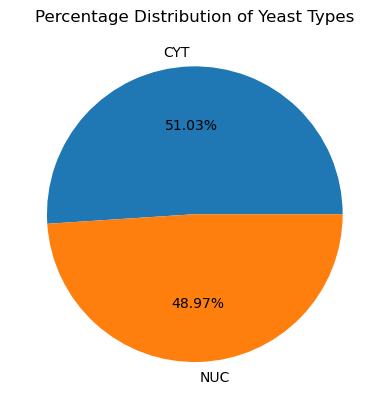

In [31]:
# plotting the pie chart for Yeast Type
value_count = df['YeastType'].value_counts()

plt.pie(x=value_count.values , autopct='%0.2f%%', labels = value_count.keys())

plt.title('Percentage Distribution of Yeast Types')
plt.show()

**The dataset contains two yeast types: NUC, which represents 48.97% of the data, and CYT, which makes up 51.03%.**

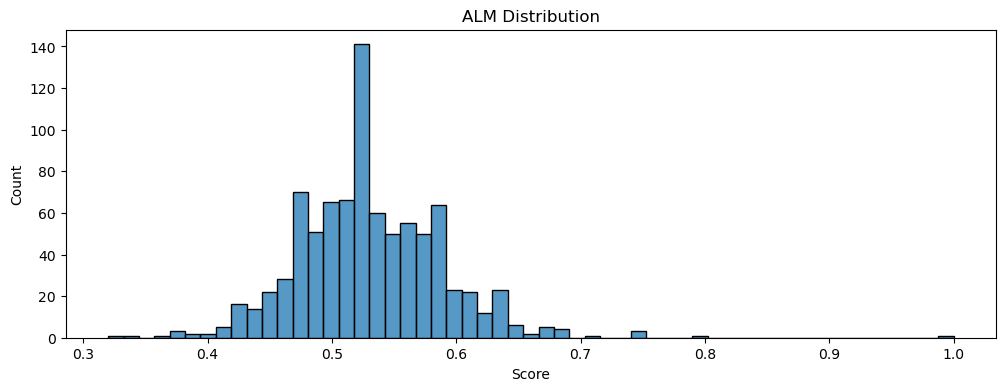

In [33]:
# ALM score distribution plot
plt.figure(figsize=(12,4))
sns.histplot(df['ALM'])

plt.title('ALM Distribution')
plt.xlabel('Score')
plt.show()

**ALM seems to follow a normal distribution, but there are some outliers present**

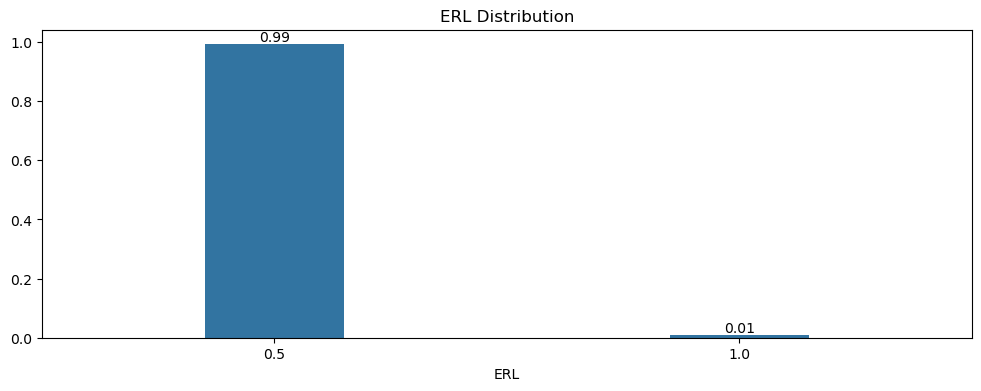

In [55]:
# ERL distribution plot
plt.figure(figsize=(12,4))
value_count = df['ERL'].value_counts(normalize=True)
ax = sns.barplot(x=value_count.keys() , y=value_count.values,width=0.3)

for p in ax.patches:
    plt.text(
        p.get_x()+p.get_width()/2,
        p.get_height(),
        f'{p.get_height():.2f}',
        ha='center',
        va='bottom'
    )

plt.title('ERL Distribution')
plt.show()

**ERL contain 99% of the value 0.5 while 1% of the value 1**

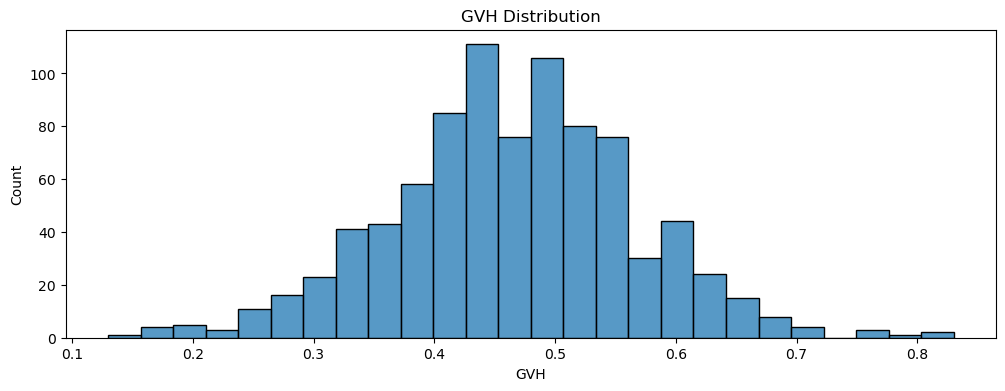

In [35]:
# GVH distribution plot 
plt.figure(figsize=(12,4))
sns.histplot(df['GVH'])

plt.title('GVH Distribution')
plt.show()

**GVH chart seems to be normally distributed**

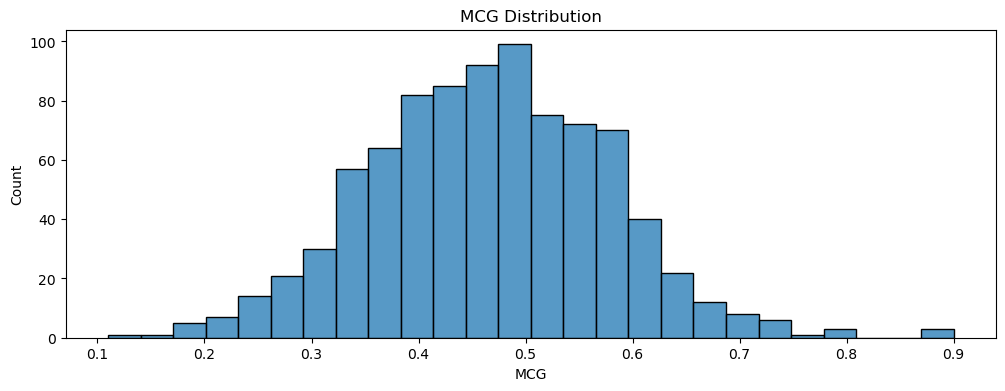

In [38]:
# MCG Distribution plot
plt.figure(figsize=(12,4))
sns.histplot(df['MCG'])

plt.title('MCG Distribution')
plt.show()

**MCG seems to be normally distributed**

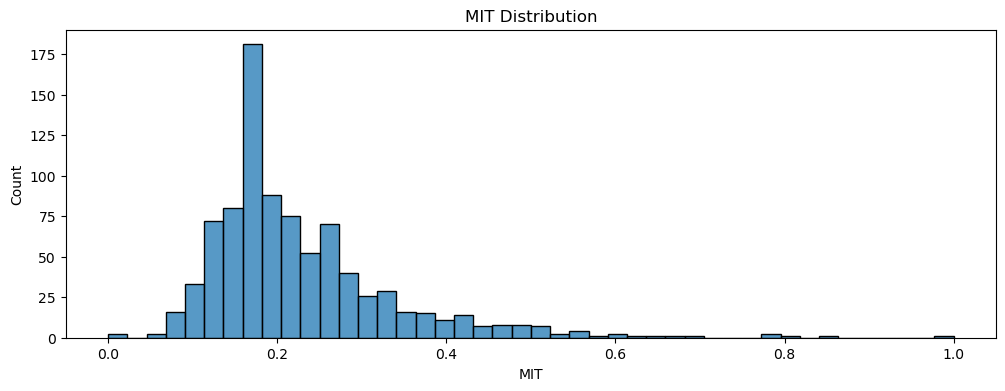

In [180]:
plt.figure(figsize=(12,4))
sns.histplot(df['MIT'])

plt.title('MIT Distribution')
plt.show()

**Majority of data falls in the range of 0.1 to 0.3, but seems there are some outliers in data**

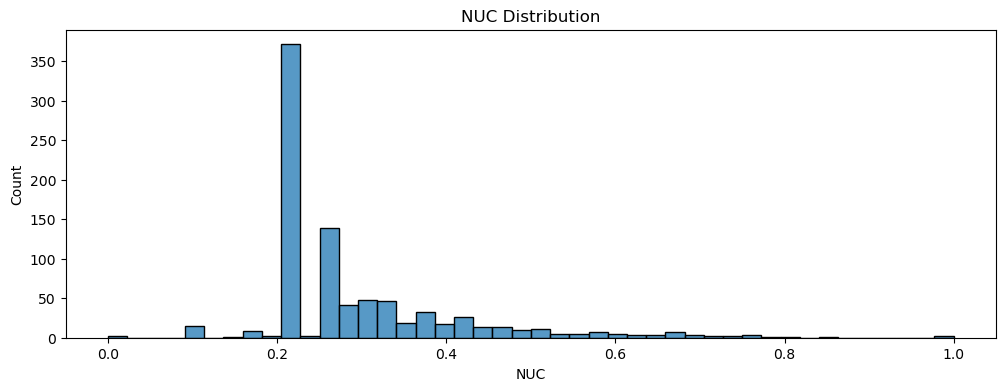

In [42]:
# NUG Distribution plot
plt.figure(figsize=(12,4))
sns.histplot(df['NUC'])

plt.title('NUC Distribution')
plt.show()

**Majority of data falls in the range of 0.2 to 0.4, but seems there are some outliers in data**

POX
0.0    869
0.5      1
Name: count, dtype: int64


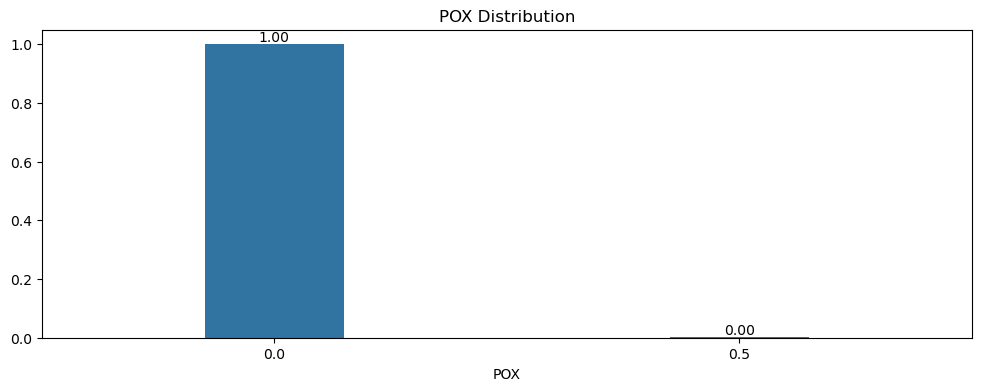

In [60]:
# POX distribution plot
plt.figure(figsize=(12,4))
print( df['POX'].value_counts())
value_count = df['POX'].value_counts(normalize=True)
ax = sns.barplot(x=value_count.keys() , y=value_count.values,width=0.3)

for p in ax.patches:
    plt.text(
        p.get_x()+p.get_width()/2,
        p.get_height(),
        f'{p.get_height():.2f}',
        ha='center',
        va='bottom'
    )

plt.title('POX Distribution')
plt.show()

**The majority of the POX values are 0.0, accounting for 869 occurrences, while the value 0.5 is extremely rare, with only 1 occurrence. This indicates a highly imbalanced distribution in the POX variable.**

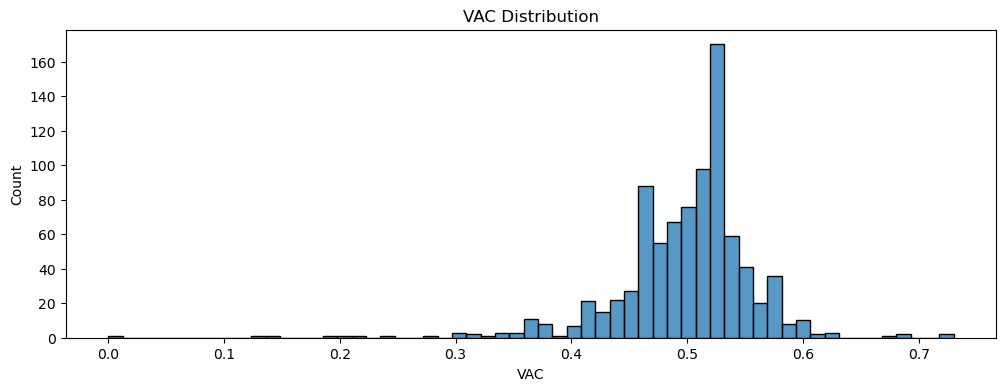

In [63]:
# VAC Distribution plot
plt.figure(figsize=(12,4))
sns.histplot(df['VAC'])

plt.title('VAC Distribution')
plt.show()

**Majority of data falls in the range of 0.4 to 0.6, but seems there are some outliers in data**

<div class='alert alert-info alert-block' align='center'><h3><b>Outliers Handling (Winsorization method)</b></h3></div>

In [70]:
# Define Winsorization limits (5th and 95th percentiles)
lower_limit = 0.05
upper_limit = 0.95

# Apply Winsorization
for col in df.select_dtypes(include=['float', 'int']).columns:
    lower_bound = df[col].quantile(lower_limit)
    upper_bound = df[col].quantile(upper_limit)

    # Cap values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print(df.shape)

(870, 10)


<div class='alert alert-info alert-block' align='center'><h3><b>Scaling and Encoding</b></h3></div>

In [74]:
# getting numerical and categorical columns
def sepration_column(dataset):
    numerical = []
    categorical = []
    # running loop to append numerical and categorical columns name
    for col in dataset.columns:
        if dataset[col].dtype in ['int','float']:
            numerical.append(col)
        else:
            categorical.append(col)
    return numerical , categorical
numerical , categorical = sepration_column(df)

# getting binary columns name
def binary_columns(dataset):
    binary_col = []
    for col in dataset.columns:
        unique_values = dataset[col].unique()
        if set(unique_values).issubset({0, 1}):
            binary_col.append(col)
    return binary_col
binary_col = binary_columns(df)

# removing binary columns from numerical column
numerical = [ i for i in numerical if i not in binary_col]

# applying encoding to categorical columns
def encoding(dataset):
    encoder= LabelEncoder()
    for col in categorical:
        dataset[col] = encoder.fit_transform(dataset[col])
    return dataset
df = encoding(df)

# applying scaling to numerical columns
def scaling(dataset):
    scaler = StandardScaler()
    df[numerical] = scaler.fit_transform(df[numerical])
    return dataset

df = scaling(df)

In [76]:
# top 5 rows of the data
df.head()

,SequenceName,MCG,GVH,ALM,MIT,ERL,POX,VAC,NUC,YeastType
0,2,1.159125,-0.267643,0.793842,-1.021073,0.0,0.0,0.903121,-0.730982,1
1,3,0.445367,-0.710533,0.594522,-0.572646,0.0,0.0,-0.235927,-0.730982,0
2,42,0.139470,-0.156921,1.192481,-0.236326,0.0,0.0,1.586550,0.478824,1
3,4,-0.676254,-0.821255,1.391801,-0.796860,0.0,0.0,1.586550,0.075555,0
4,5,-0.370357,-0.821255,0.195883,-0.124219,0.0,0.0,0.675312,-0.226897,1


In [78]:
# dropping Sequence Name from data as it not going to help in modelling 
df = df.drop('SequenceName',axis=1)

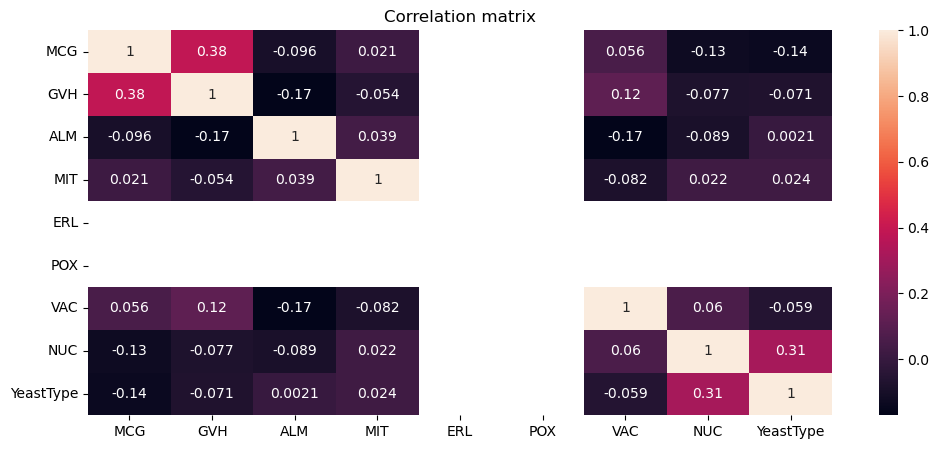

In [80]:
# plotting correlation matrix
corr = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

<div class='alert alert-info alert-block' align='center'><h3>Model training and Testing</h3></div>

#### Splitting the data for train and test

In [89]:
X = df.drop('YeastType',axis=1)
y = df['YeastType']

In [91]:
# splitting the data for train and test

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2  , random_state=34)

# printing the shapes of splitted train and test data
print('Shape of features train data : ',X_train.shape)
print('Shape of target train data : ',y_train.shape)
print('Shape of feature test data : ',X_test.shape)
print('Shape of target test data : ',y_test.shape)

Shape of features train data :  (696, 8)
Shape of target train data :  (696,)
Shape of feature test data :  (174, 8)
Shape of target test data :  (174,)


In [101]:
svc = SVC(probability=True)

# fitting the model 
model = svc.fit(X_train , y_train)

# predicting for train data
y_pred_train = model.predict(X_train)

# checking the accuracy score for train data
print('Accuracy Score for train data: ', accuracy_score(y_train , y_pred_train)*100)

Accuracy Score for train data:  71.12068965517241


### Testing for test data

In [103]:
# testing the model on test data

# predicting for train data
y_pred_test = model.predict(X_test)

# checking the accuracy score for train data
print('Accuracy Score for test data: ',accuracy_score(y_test , y_pred_test)*100)

Accuracy Score for test data:  71.83908045977012


##### accuracy score for both the training data and testing data is almost same

### Confusion Matrix

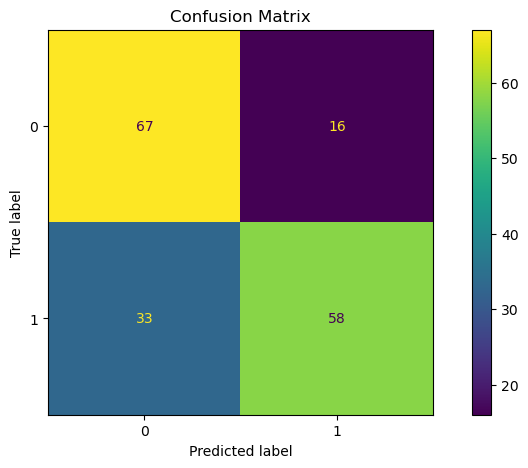

In [107]:
# displaying confusion matrix 
cm = confusion_matrix(y_test , y_pred_test)

fig,ax = plt.subplots(figsize=(10,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', ax=ax) 
plt.title("Confusion Matrix") 
plt.show()

### ROC Curve

In [110]:
roc_auc_score(y_test , model.predict_proba(X_test)[:,1])

0.7647292466569575

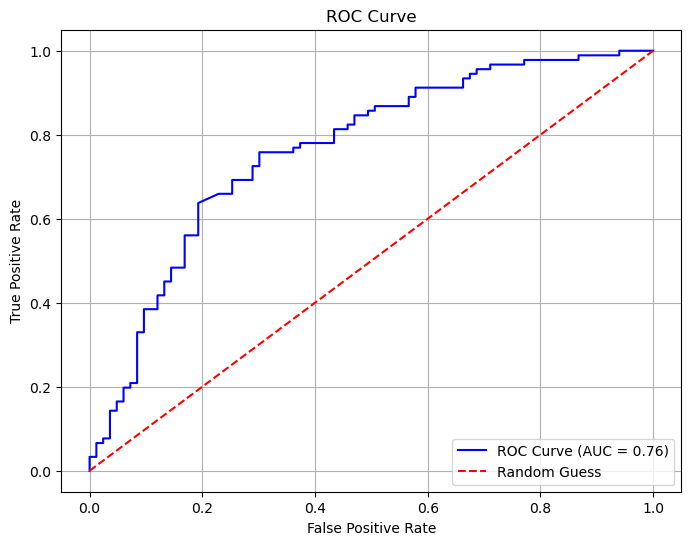

In [112]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color='red')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### log Loss

In [115]:
log_loss(y_test , y_pred_test)

10.150224230268623

### Classification Report

In [121]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,y_pred_test,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.67      0.81      0.73        83
 Positive(1)       0.78      0.64      0.70        91

    accuracy                           0.72       174
   macro avg       0.73      0.72      0.72       174
weighted avg       0.73      0.72      0.72       174



<div class='alert alert-info alert-block' align='center'><h3>Hypertunning the model</h3></div>

In [126]:
# parameter for hypertunning the model
param_grid = [{
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}]

# using gridsearch method to find best parameter 
grid_search = GridSearchCV(svc ,param_grid=param_grid , cv=5 , scoring='accuracy')

# fitting the model
grid_search.fit(X_train , y_train)

# getting the parameters , score after grid search
best_params = grid_search.best_params_
score = grid_search.best_score_

# printing the parameters , score
print(best_params)
print(score)

{'kernel': 'rbf'}
0.6451284686536485


In [128]:
# parameter for hypertunning the model
param_grid = [{
    'kernel':['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1,10,100]
    
}]

# using gridsearch method to find best parameter 
grid_search = GridSearchCV(svc ,param_grid=param_grid , cv=5 , scoring='accuracy')

# fitting the model
grid_search.fit(X_train , y_train)

# getting the parameters , score after grid search
best_params = grid_search.best_params_
score = grid_search.best_score_

# printing the parameters , score
print(best_params)
print(score)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.6609763617677287


In [130]:
best_model = grid_search.best_estimator_

In [132]:
# predicting using best model

y_pred = best_model.predict(X_test)

accuracyScore = accuracy_score(y_test , y_pred)
print('Accuracy Score : ',accuracyScore)

Accuracy Score :  0.7068965517241379


### updating the score card 

In [135]:
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

def update_score_card(score_card, y_test, y_pred, model_name, y_prob=None):
    """
    Updates the score_card DataFrame with evaluation metrics for a given model.
    """
    metrics = {
        'model_name': model_name,
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred, average='binary', zero_division=0),
        'Recall Score': recall_score(y_test, y_pred, average='binary', zero_division=0),
        'f1 Score': f1_score(y_test, y_pred, average='binary', zero_division=0)
    }
    
    if y_prob is not None:
        metrics['AUC Score'] = roc_auc_score(y_test, y_prob)
    else:
        metrics['AUC Score'] = None

    # Create a new DataFrame for the metrics
    metrics_df = pd.DataFrame([metrics])

    # Concatenate with the existing score_card
    score_card = pd.concat([score_card, metrics_df], ignore_index=True)
    return score_card


In [137]:
score_card = update_score_card(score_card , y_train , y_pred_train , 'Train Data',model.predict_proba(X_train)[:,1])

In [139]:
score_card = update_score_card(score_card , y_test , y_pred_test , 'Test Data',model.predict_proba(X_test)[:,1])

In [141]:
score_card = update_score_card(score_card , y_test , y_pred , 'Tunned model',best_model.predict_proba(X_test)[:,1])

In [143]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,Train Data,0.711207,0.739286,0.617910,0.783098,0.673171
1,Test Data,0.718391,0.783784,0.637363,0.764729,0.703030
2,Tunned model,0.706897,0.756410,0.648352,0.761750,0.698225


**The initial model seems to perform better than the tuned model. While the initial model showed similar accuracy scores for both training and testing data, the tuned model exhibits a lower accuracy compared to the initial model. This may indicate that the tuning process did not improve the model's generalization, possibly due to the limited volume of data.**